# Respiration Analysis
Please make sure to install `pylabfront` module in your virtual environment, before running this notebook.

```
cd pylabfront
python setup.py
```

In [8]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import pylabfront.loader
import pylabfront.respiration

## Initialize Loader

In [2]:
base_folder = Path('..') / 'sample_data'
labfront_loader = pylabfront.loader.LabfrontLoader(base_folder)

## Load Breaths per Minute

In [38]:
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 4, 21)
breaths_per_minute = pylabfront.respiration.get_waking_breaths_per_minute(labfront_loader, 
                                                                    user_id="all", 
                                                                    start_date=start_date,
                                                                    end_date=end_date,
                                                                    average=False)

In [39]:
breaths_per_minute_df = pd.DataFrame.from_dict(breaths_per_minute['sample-participant-01'], 
                                               orient='index', columns=["BreathsPerMinute"])
breaths_per_minute_df.head()

,BreathsPerMinute
2023-01-03,13.834740
2023-01-04,14.124571
2023-01-31,13.398581
2023-02-01,13.925893
2023-02-03,14.471250


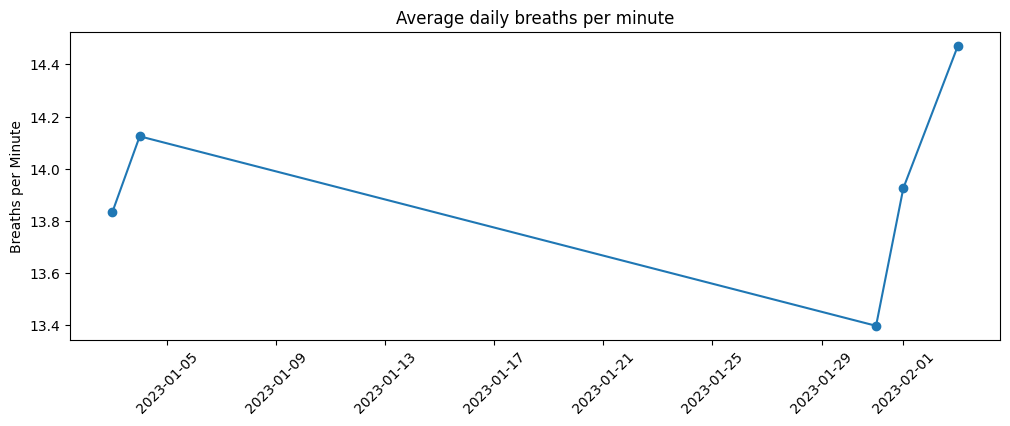

In [40]:
plt.figure(figsize=(12,4))
plt.title('Average daily breaths per minute')
plt.plot(breaths_per_minute_df.index, breaths_per_minute_df.BreathsPerMinute,'-o')
plt.ylabel('Breaths per Minute')
plt.xticks(rotation=45);